# TLE Analysis
Reading in the TLE data as a list of dictionaries. 

The sample data are TLEs of T-1 dated from __1 Jan 2016 at approximately 11:00 UTCG__ to __27 June 2017 at approximately 21:00 UTCG__. 

There are a total of __976__ samples of TLE.

In [1]:
x = '0000661'

print(float('.' + x))


6.61e-05


In [2]:
import numpy as np
import pandas as pd

def read_TLE(tle):
    '''
    First Line
    Epoch Year (19-20)
    Epoch (21-32)
    First time derivative of the mean motion divided by 2 (32-43)
    Second time derivative of mean motion divided by 6 (45-52)
    BStar drag term (54-61)

    Second Line
    Inclination (degrees) (09-16)
    RAAN (degrees) (18-25)
    Eccentricity (27-33)
    Argument of perigee (35-42)
    Mean Anomaly (44-51)
    Mean Motion (53-63)
    '''

    temp = []
    df = pd.read_csv(tle, header = None).as_matrix()
    for i in range(df.shape[0]):
        if i%2 == 0:
            test_df1 = df[i,0]
            test_df2 = df[i+1,0]
            
            dic1= {'Epoch Year': float(test_df1[18:20])}
            dic2 = {'Epoch': float(test_df1[20:32])}
            dic3 = {'1st dmdt /2' : float(test_df1[32:43]) }
            dic4 = {'2md dmdt/2': float(test_df1[44:50]) * 10**(-float(test_df1[51]))}
            dic5 = {'BStar' : float(test_df1[53:59]) * 10**(-float(test_df1[60]))}
            dic6 = {'Incl' : float(test_df2[8:16])}
            dic7 = {'RAAN': float(test_df2[17:25])}
            dic8 = {'Eccentricity' : float('.' + test_df2[26:33])}
            dic9 = {'AOP' : float(test_df2[34:42])}
            dic10 = {'Mean Anomaly' : float(test_df2[43:51])}
            dic11 = {'Mean Motion' : float(test_df2[52:63])}

            temp.append({**dic1,**dic2,**dic3,**dic4,**dic5,**dic6,**dic7,**dic8,**dic9,**dic10,**dic11})

    return temp

data = read_TLE('sat41167.txt')

## Getting the respective attributes to performance analysis

we would be looking at the the Epoch against the other attributes

## Overview

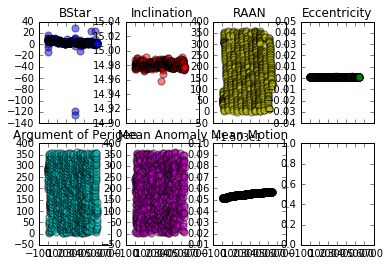

In [3]:
import matplotlib.pyplot as plt

dataEpoch = []
dataBStar = []
dataIncl = []
dataRAAN = []
dataEccentricity = []
dataAOP = []
dataMeanAnomaly = []
dataMeanMotion = []

for i in range(len(data)):
    dataBStar.append(data[i].get('BStar'))
    dataIncl.append(data[i].get('Incl'))
    dataRAAN.append(data[i].get('RAAN'))
    dataEccentricity.append(data[i].get('Eccentricity'))
    dataAOP.append(data[i].get('AOP'))
    dataMeanMotion.append(data[i].get('Mean Motion'))
    dataMeanAnomaly.append(data[i].get('Mean Anomaly'))
    
    tempEpoch = (data[i].get('Epoch Year') - 16.0)*365 + data[i].get('Epoch')
    dataEpoch.append(tempEpoch)

    

fig, ax = plt.subplots(2,4,sharex = 'all')
color = np.linspace(1,7,7)
ax[0][0].scatter(dataEpoch,dataBStar, s= 50, alpha = 0.5, c = 'b')
ax[0][0].set_title('BStar')
ax[0][1].scatter(dataEpoch,dataIncl, s= 50, alpha = 0.5, c = 'r')
ax[0][1].set_title('Inclination')
ax[0][2].scatter(dataEpoch,dataRAAN, s= 50, alpha = 0.5, c = 'y')
ax[0][2].set_title('RAAN')
ax[0][3].scatter(dataEpoch,dataEccentricity, s= 50, alpha = 0.5, c = 'g')
ax[0][3].set_title('Eccentricity')
ax[1][0].scatter(dataEpoch,dataAOP, s= 50, alpha = 0.5, c = 'c')
ax[1][0].set_title('Argument of Perigee')
ax[1][1].scatter(dataEpoch,dataMeanAnomaly, s= 50, alpha = 0.5, c = 'm')
ax[1][1].set_title('Mean Anomaly')
ax[1][2].scatter(dataEpoch,dataMeanMotion, s= 50, alpha = 0.5, c = 'k')
ax[1][2].set_title('Mean Motion')
plt.show()

## Understanding the True anomaly and Mean anomaly

For a two-body system, the true anomaly is the angle between the vector from the focus to the satellite and the perigee. It is one of the 6 Keplarian elements and it gives the position of the satellite at a given time in the orbit. It is often denoted by $\nu$.

However, espically in highly eccentric oribts, it is difficult to find the true anomaly as the angular speed of the satellite is not constant. There is where the mean anomaly, $M$, comes to help. The mean anomaly is the angle from the pericenter of which a fictitious body would have if it have moved in a circular orbit, at constant angular speed. The mean motion of satellite in a two-body system is given by;

$$n = \frac{\mu}{a^3}$$

where $\mu$ is the gravitational potential and $a$ is the semi-major axis.

Using the mean anomaly, the subsequent positions of the satellites can be easily calculated by first calculating the new M given by;

$$M(\Delta t) = n \Delta t + M_0 $$

A conversion back to the true anomaly can be done by know the eccentricity anomaly often denoted by $E$

From wikipedia, the mean anomaly can also be expanded as a power series of the true anomaly and eccentricity as such;

$$M = \nu - 2 e \sin \nu + (3/4 e^2 + 1/8 e^4) \sin \nu + ...$$

A very good video is given here:
https://www.youtube.com/watch?v=cf9Jh44kL20


## Unwrapping Angle

The unwrapping data is decreasing with Epoch
taking a step of 360 deg:  35
taking a step of 360 deg:  119
taking a step of 360 deg:  174
taking a step of 360 deg:  241
taking a step of 360 deg:  318
taking a step of 360 deg:  396
taking a step of 360 deg:  465
taking a step of 360 deg:  549
taking a step of 360 deg:  648
taking a step of 360 deg:  733
taking a step of 360 deg:  779
356.8584
9.277


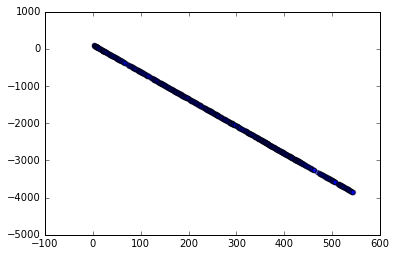

In [44]:
def unwrapping(data, increasing = True):
    counter = 0
    dataUnwrapped = []
    thresholdDe = 100
    thresholdIn = 100
    if increasing:
        print("The unwrapping data is increasing with Epoch")
        for i in range(len(data)):
            dataUnwrapped.append(data[i] + counter*360.0)
            if i < len(data)-1 and data[i+1] - data[i] < -thresholdIn :
                print('taking a step of 360 deg: ',i)
                counter += 1
    else:
        print("The unwrapping data is decreasing with Epoch")
        for i in range(len(data)):
            dataUnwrapped.append(data[i] + counter*360.0)
            if i < len(data)-1 and data[i+1] - data[i] > thresholdDe :
                print('taking a step of 360 deg: ',i)
                counter -= 1
    
    return dataUnwrapped

dataRAANUnwrapped = unwrapping(dataRAAN, False)
plt.scatter(dataEpoch,dataRAANUnwrapped, alpha = 0.5)

index = 81
print(dataAOP[index])
print(dataAOP[index + 1])

# dataMeanAnomalyUnwrapped = unwrapping(dataMeanAnomaly,False)
# plt.scatter(dataEpoch,dataMeanAnomalyUnwrapped, alpha = 0.5)

# dataAOPUnwrapped = unwrapping(dataAOP)
# plt.scatter(dataEpoch,dataAOPUnwrapped, alpha = 0.5)

plt.show()

In [11]:
len(dataRAAN)

826

## Epoch vs BStar

452
453
454
738
783
pt1:  300.55427144 pt2:  301.47873259 pt3:  301.54492303 pt4:  360.33516666


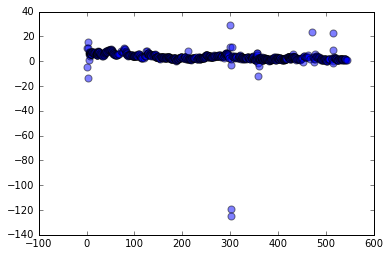

In [6]:
import matplotlib.pyplot as plt
dataEpoch = []
dataBStar = []

for i in range(len(data)):
    dataBStar.append(data[i].get('BStar'))
    tempEpoch = (data[i].get('Epoch Year') - 16.0)*365 + data[i].get('Epoch')
    dataEpoch.append(tempEpoch)

for i in range(len(dataBStar)):
    if abs(dataBStar[i]) > 20:
        print(i)

print('pt1: ', dataEpoch[452],'pt2: ', dataEpoch[453],'pt3: ', dataEpoch[454],'pt4: ', dataEpoch[548])

plt.scatter(dataEpoch,dataBStar, s= 50, c = 'b', alpha = 0.5)
plt.show()

In [7]:
pt1:  299.89520833 pt2:  299.96240741 pt3:  300.03513889 pt4:  300.17740741
pt1:  300.55427144 pt2:  301.47873259 pt3:  301.54492303

SyntaxError: invalid syntax (<ipython-input-7-a7f4fdc22de2>, line 1)

## Inclination vs Epoch

In [ ]:
dataIncl = []

for i in range(len(data)):
    dataIncl.append(data[i].get('Incl'))

# for i in range(len(dataBStar)):
#     if dataBStar[i] < 0:
#         print(i)

# print('pt1: ', dataEpoch[545],'pt2: ', dataEpoch[546],'pt3: ', dataEpoch[547],'pt4: ', dataEpoch[548])

plt.scatter(dataEpoch,dataIncl, s= 50, c = 'b', alpha = 0.5)
plt.show()

## RAAN vs Epoch

In [ ]:
x = data[0].get('Eccentricity')
print(x)

In [ ]:
dataRAAN= []

for i in range(len(data)):
    dataRAAN.append(data[i].get('RAAN'))

plt.scatter(dataEpoch,dataRAAN, s= 50, c = 'b', alpha = 0.5)
plt.show()

## Eccentricity vs Epoch

In [ ]:
dataEccentricity = []

for i in range(len(data)):
    dataEccentricity.append(data[i].get('Eccentricity'))


plt.scatter(dataEpoch,dataEccentricity, s= 50, c = 'b', alpha = 0.5)
plt.show()

## Argument of Perigee vs Epoch

In [ ]:
dataAOP = []

for i in range(len(data)):
    dataAOP.append(data[i].get('AOP'))


plt.scatter(dataEpoch,dataAOP, s= 50, c = 'b', alpha = 0.5)
plt.show()

## Mean Anomaly vs Epoch

In [ ]:
dataMeanAnomaly = []

for i in range(len(data)):
    dataMeanAnomaly.append(data[i].get('Mean Anomaly'))


plt.scatter(dataEpoch,dataMeanAnomaly, s= 50, c = 'b', alpha = 0.5)
plt.show()

## Mean Motion vs Epoch

In [ ]:
dataMeanMotion = []

for i in range(len(data)):
    dataMeanMotion.append(data[i].get('Mean Motion'))


plt.scatter(dataEpoch,dataMeanMotion, s= 50, c = 'b', alpha = 0.5)
print(len(data))
plt.show()

## Spectral Analysis
It seems that the eccentricity, mean motion and its derivatives, can be modelled with a straight line. For the other attributes, we would try to look at the spectral content of the signal by doing a FFT.


543.9257244099999
0.7583756044034168
10
0.0183848631371
Peak Value:  0.199177683046


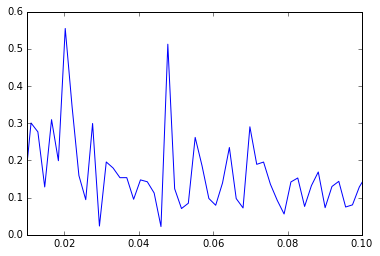

In [64]:
import numpy.fft as fft

N = len(dataEpoch)
Td = dataEpoch[-1]
print(Td)
Fs = N/Td

freqLim = Fs/N * (N-1)
print(freqLim/2)
X = np.linspace(0,freqLim,N)
Y = fft.fft(dataIncl)
Ymag = np.sqrt(Y.real**2 + Y.imag**2)
Yphase = np.arctan(Y.imag/Y.real)

plt.plot(X,Ymag)
axes = plt.gca()
axes.set_xlim([0.01,0.1])

test = np.argmax(Ymag[1:])
print(test)
print(X[test])
print('Peak Value: ',Ymag[test])
axes.set_ylim([0,0.6])
plt.show()